<a href="https://colab.research.google.com/github/yje0515/PythonStudy2025/blob/main/07_01_%EC%9D%B8%EA%B3%B5%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# MBC 마켓에서 이번엔 럭키백을 패션분야에 접목시키려고 한다.

# 상품 개수가 늘어나고, 일반 잡화로 제공한다.

# 딥러닝의 시작 인공신경망

# MNIST 데이터 셋 : 손으로 쓴 0~9 까지의 숫자로 이루어져 있음
# 패션 Mnist 데이터 셋 : 숫자 대신 패션아이템으로 이루어짐
# https://www.kaggle.com/datasets 캐글에가면 연습용 데이터 셋이 많다.
# https://www.aihub.or.kr/ 국내에서 제공하는 연습용 데이터 셋 & 동영상강의

# tensorflow 연산을 결정적으로 만듭니다.
import tensorflow as tf

# 실행마다 동일한 결과를 얻기 위해 캐라스에 랜덤 시드를 사용
tf.keras.utils.set_random_seed(42)

# 파이참이나 다른곳 버전 오류 해결용
tf.config.experimental.enable_op_determinism()

# 캐라스 패키지
from tensorflow import keras

# load_data()가 훈련세트와 테스트세트로 데이터를 나누어 반환
# ( input과 target의 쌍으로 이루어짐)
(train_input,train_target),(test_input,test_target) = keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
print(train_input.shape,train_target.shape)
print(test_input.shape,test_target.shape)
# (60000, 28, 28) (60000,) (개수,가로,세로) 1차원 배열
# (10000, 28, 28) (10000,)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


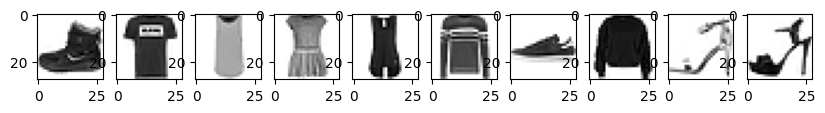

In [5]:
import matplotlib.pyplot as plt

fig,axs = plt.subplots(1,10,figsize=(10,10))
for i in range(10):
    axs[i].imshow(train_input[i],cmap='gray_r')
    axs[i].axis('on')
plt.show()
# 0티셔츠, 1바지, 2스웨터, 3드레스, 4코트, 5샌달, 6셔츠, 7스니커즈, 8가방, 9앵클부츠

In [6]:
print([train_target[i] for i in range(10)]) # 샘플 타깃 확인
# 0~9까지 [9, 0, 0, 3, 0, 2, 7, 2, 5, 5]

[np.uint8(9), np.uint8(0), np.uint8(0), np.uint8(3), np.uint8(0), np.uint8(2), np.uint8(7), np.uint8(2), np.uint8(5), np.uint8(5)]


In [7]:
import numpy as np

print(np.unique(train_target,return_counts=True))
# 10개의 배열에 6000개씩 샘플이 들어있음

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


In [9]:
# 로지스틱 회귀로 패션 아이템 분류하기

# 6만개 전체를 한번에 훈련하는 것 보다 샘플을 1개씩 꺼내서 모델을 훈련해보자.
# 확률적 경사 하강법 : SGDClassifier ( 분류용 )
# SGDClassifier 을 사용할 때 표준화 전처리된 데이터를 사용
# 확률적 경사 하강법은 여러 특성 중 기울기가 가장 가파른 방향을 따라 이동
# 만약 특성마다 값의 범위가 많이 다르면 올바르게 손실함수의 경사를 내려올 수 없음
# 패션 MNIST의 경우 흑백이기에 0~ 255 사이의 정수값을 가짐 (RGB?)
# -> 255로 나누어 0~1 사이값으로 정규화 진행 (양수값으로 이루어진 이미지 전처링ㅇ)

# reshape 으로 2차원 배열을 1차원 배열로 펼친
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1,28*28) # -1 : 모든 값
print(train_scaled.shape)
# SGDClassifier 는 2차원을 지원하지 않음 28*28 = 785 ( 특성 )

(60000, 784)


In [11]:
from sklearn.model_selection import cross_validate  # 크로스검증
from sklearn.linear_model import SGDClassifier      # 경사하강법

sc = SGDClassifier(loss='log_loss', max_iter=5, random_state=42)
# max_iter 5번 반복(에포크), cross_validate 교차 검증
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score'])) # 5번 반복에 대한 테스트 평균, 35초 정도 걸림
# 81.94%

0.8194166666666666


In [ ]:
# 로지스틱 회귀 가중치 중요도?
# z = a * (Weight) + b * (Length) + c * (Diagonal) + d * (Height) + e * (Width) + f

# 선형방정식
# z_티셔츠 = a * (픽셀1) + b * (픽셀2) + c * (픽셀3) + d * (픽셀4) ... + e * (픽셀784) + f(절편)

# 바지에 대한 출력은 티셔츠와 다른 값을 사용해야 함(티셔츠와 다름)
# z_바지 = a1 * (픽셀1) + b1 * (픽셀2) + c1 * (픽셀3) + d1 * (픽셀4) ... + e1 * (픽셀784) + f1(절편)

# 나머지 클래스에 대한 선형 방정식도 동일 -> 10개의 클래스에 대한 선형 방정식을 모두 계산함.
# 다음 단계인 소프트맥스 함수를 통과하여 각 클래스에 대한 확률을 얻을 수 있음
# 0티셔츠, 1바지, 2스웨터, 3드레스, 4코트, 5샌달, 6셔츠, 7스니커즈, 8가방, 9앵클부츠

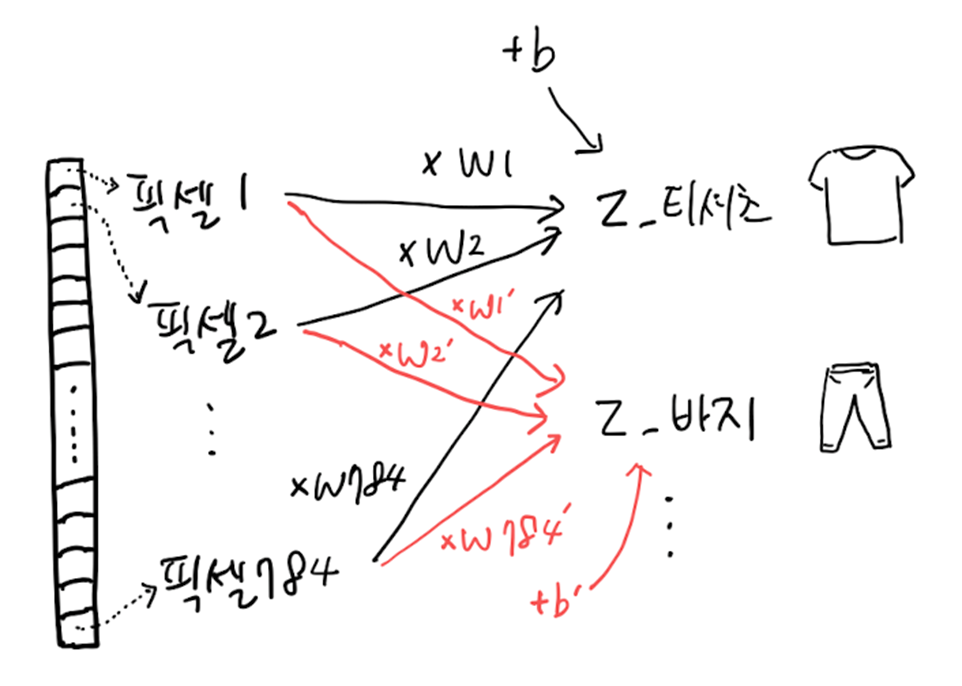

In [ ]:
# 인공신경망 (artificial neural network, ANN)
# 패션 아이템 분류 문제의 성능을 높여보다.

# z_티셔츠~ z_앵클부츠 클래스 10개인 z_10가지 계산하고 이를 바탕으로 클래스를 예측하기 때문에
# 신경망의 최종 값은 출력층(output Layer)

# 인공 신경망의 z값 계산하는 단위 : 뉴런(Neuron)
# -> 선형 계산을 진행 (대부분 유닛이라고 부른)

# 픽셀 1 ~ 784번 픽셀까지를 입력층(input layer)이라고 부름 -> train_scaled

# z_1을 만들기 위해서 픽셀 1인 x_1에 곱해지는 가중치는 w_1,1...10개의 뉴런
# 사람 뇌에 있는 뉴런과 다름 (무언가를 만들어내는 것이 아니라 알고리즘의 일종)
# 확률적 경사 하강법을 사용한 로지스틱 회귀 모델이
# 가장 간단한 인공신경망이라면 인공 신경망을 만들어도 성능이 좋아지지 않는다.
# 이미 인공신경망을 만들었다.
# 확률적 경사 하강법을 사용한 로지스틱 회귀는 가장 간단한 인공 신경망 모델이다.

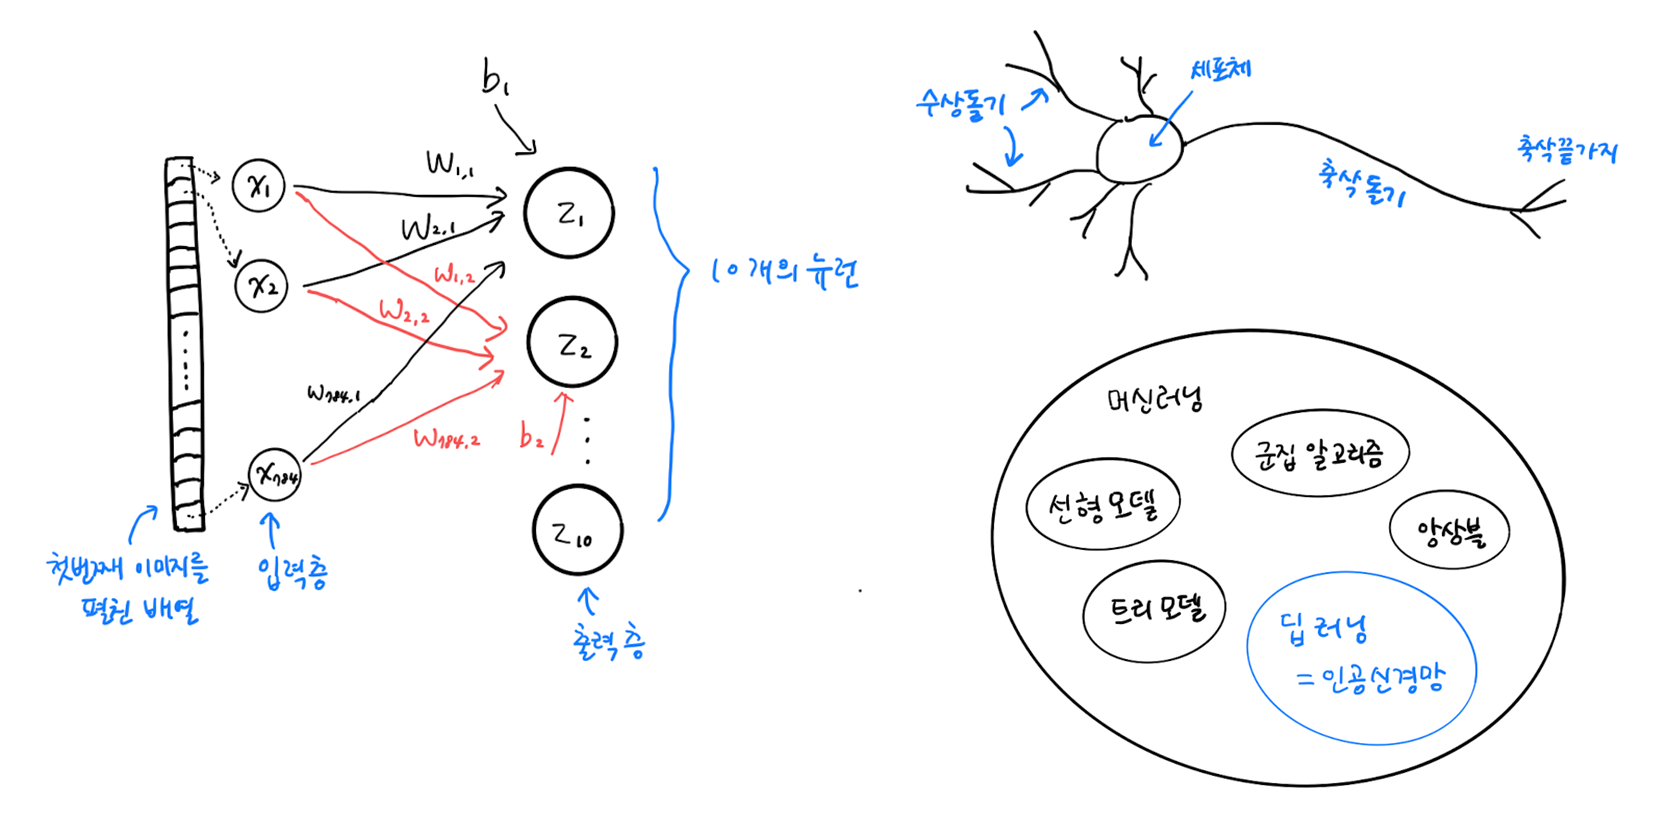

In [ ]:
# 딥러닝 라이브러리에서 인기 높은 텐서플로우를 사용해보자
# TensorFlow
# 구글이 2015년 11월 오픈소스로 공개한 딥러닝 라이브러리
# 텐서플로우 2.x 버전이 2019년 9월에 릴리즈됨
import tensorflow as tf
from tensorflow import keras # 고수준 api
# 딥러닝 라이브러리는 GPU(그래픽카드)를 사용하여 인공신경망을 훈련한
# GPU는 벡터와 행렬 연산으로 3D 연산에 최적화 되어있음
# 곱셈과 덧셈이 많이 수행되는 인공신경망의 속도를 높여준다.
# 케라스 라이브러리는 직접 gpu 연산을 수행하지 않는다.
# https://www.youtube.com/watch?v=AKob3yZT0I4
# 대신 GPU 연산을 수행하는 다른 라이브러리를 백엔드로 사용
# 텐서 플로우가 케라스 백엔드로 사용할 수 있다 -> 멀티-백엔드 케라스 라고 부름
# 케라스 API만 익히면 다양한 딥러닝 라이브러리를 입맛대로 골라서 사용할 수 있다.
# (직관적이고 사용하기 편함)

In [12]:
# 인공 신경망으로 모델 만들기 : 앞에서 만든 train_scaled, train_target을 사용
# 인공 신경망에서는 교차 검증을 사용하지 않고 검증세트를 별도로 덜어내어 사용
# 이유 1 : 딥러닝 분야의 데이터셋은 충분히 크기 때문에 검증 점수가 안정적
# 이유 2 : 교차 검증을 수행하기에는 훈련시간이 너무 오래걸림 (fit 시간이 몇날 며칠이 걸릴 수 있음)
from sklearn.model_selection import train_test_split

# train_scaled, val_scaled(20%)
# train_target, val_target(20%)
train_scaled, val_scaled,train_target,val_target = train_test_split(
    train_scaled,train_target,test_size=0.2,random_state=42)

print(train_scaled.shape,train_target.shape) # 훈련세트 48,000개
print(val_scaled.shape,val_target.shape) # 검증세트 12,000개

(48000, 784) (48000,)
(12000, 784) (12000,)


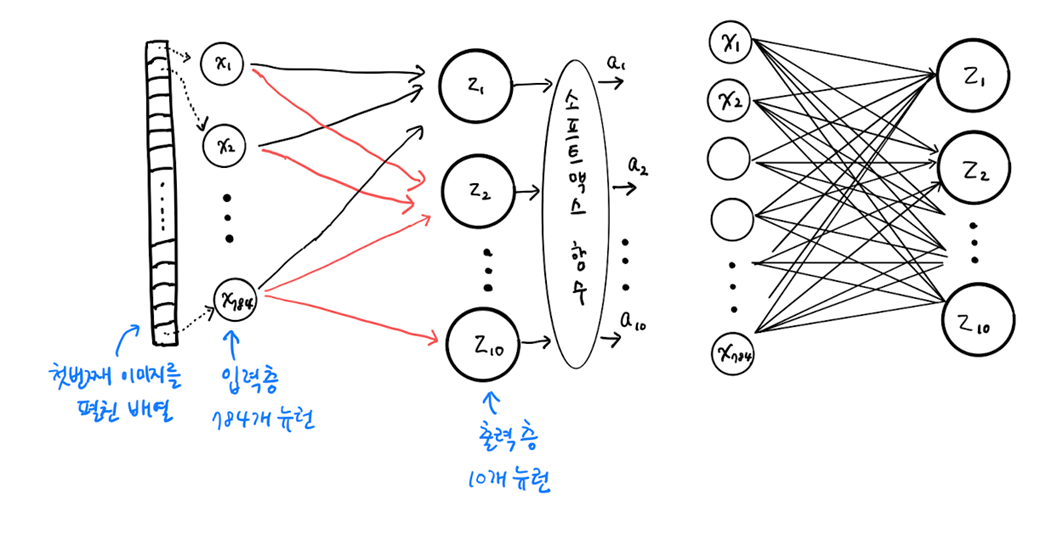

In [ ]:
# 딥러닝에서는 다양한 종류의 층을 추가하는 식으로 모델을 만듦,
# 이번 장에서는 Dense 층을 사용 밀집층, 완전연결층, fully connected layer

# 10개의 유닛 -> 타겟이 10개
# 다중 분류이므로 활성화 함수는 소프트맥스, 입력값은 784개의 원소로 이루어진 1차원 배열(28*28)
# 이진 분류 -> 시그모이드 함수

# 케라스는 첫번째 층에 입력 크기를 넣어야 한다.
# 그 다음에 추가되는 층은 자동으로 계산되기 때문에 넣을 필요 없음.
# 케라스 모델은 Sequential(순차적) 클래스로 만듦.

# 인공신경망의 오른쪽에 놓은 층을 만듦.
# 10개의 패션 아이템을 분류하기 위해서 10개의 뉴런으로 구성

# 케라스의 레이어 패키지 안에는 다양한 층이 존재,
# 가장 기본이 되는 층이 밀집층(dense layer)
# dense layer : 784개의 픽셀과 10개의 뉴런이 모두 연결된 선이라는 뜻
# 총 784*10 = 7840개의 연결 선이 있다.

# 이런 층을 뉴런이 모두 연결하고 있어 완전 연결층(fuuly connected layer)라고 부름

In [13]:
# 딥러닝에서 사용할 레이어를 만듦
dense = keras.layers.Dense(10,       activation='softmax', input_shape=(784,))
#                         (뉴런개수, 뉴런에 적용할 함수, 입력의 크기)
# activation = 'softmax' 출력되는 값을 확률로 바꿈 -> 다중분류
# activation = 'sigmoid' 이진분류
# 입력의 크기는 10개의 뉴런이 각각 몇개의 입력을 맞는지 튜플로 지정함

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
# 이제 밀집층을 가진 신경망 모델을 만들자 -> 각각 측을 구현할 객체
model = keras.Sequential([dense])
# 밀집층을 가진 신경망 모델을 만듦, Sequential(순차적구조) 클래스를 사용함
# Sequential 클래스의 객체를 만들 때 앞에서 만든 밀집층의 객체 dense를 전달함
# 여기서 만든 model 객체가 바로 신경망 모델임!

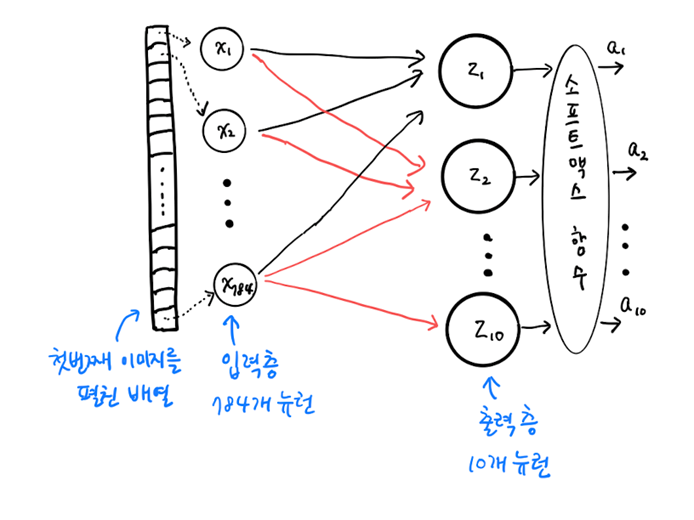

In [ ]:
# 소프트 맥스와 같이 뉴런의 선형 방정식 계산 결과에 적용되는 함수를 활성화(actication) 함수라고 함
# 위 그림의 a표시

# 인공 신경망으로 패션 아이템 분류하기 전처리 완료
# ------------------------------ 케라스 모델 훈련 전! 설정단계 끝 ------------------------------

In [18]:
# model 객체의 complie() 메서드에서 수행
# 손실함수 loss = 'sparse_categorical_crossentropy'(희소 다중분류 손실 함수) -> 정수 타깃
#                  sparse_binary_crossentropy (희소 이진분류 손실 함수) -> 이진 타깃
# 측정값 metrics = ['accuracy'] -> 정확도 (에큐러시)의 지표가 됨
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# 케라스는 자동으로 에포크마다 손실을 기록한다. (추가로 정확도 기록 metrics)
# 0티셔츠, 1바지, 2스웨터, 3드레스, 4코트, 5샌달, 6셔츠, 7스니커즈, 8가방, 9앵클부츠

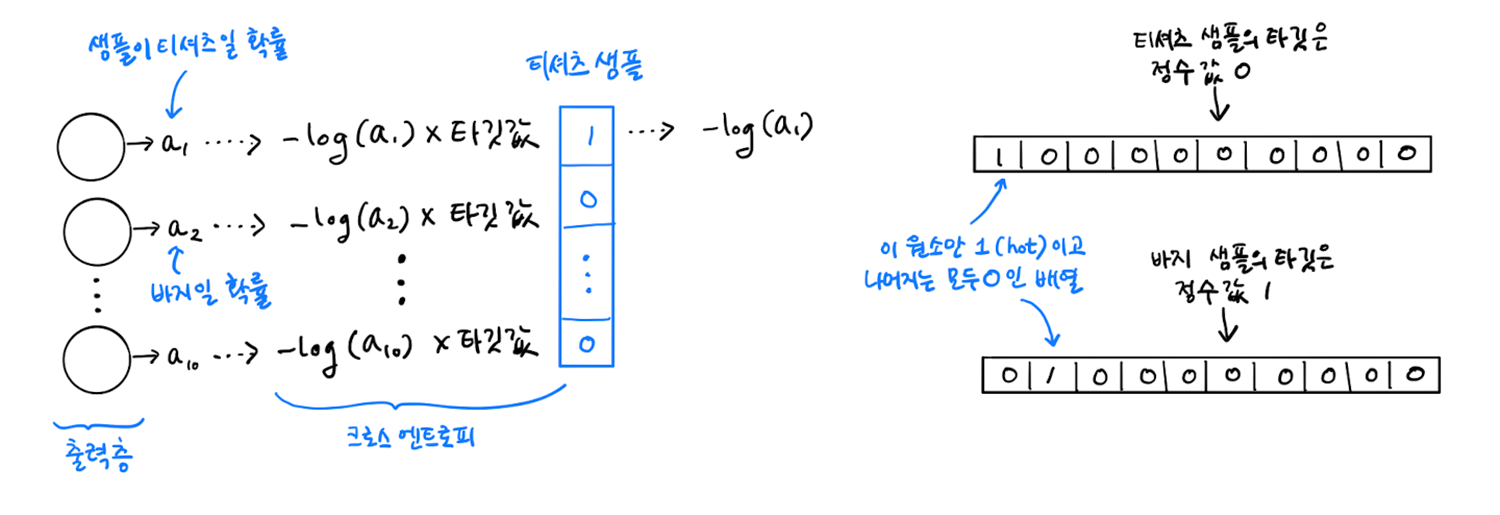

In [19]:
print(train_target[:10]) # 정수형으로 타킷 생성되어 있음 -> 원-핫 인코딩
# 정답에 인덱스가 나옴
# 0티셔츠, 1바지, 2스웨터, 3드레스, 4코트, 5샌달, 6셔츠, 7스니커즈, 8가방, 9앵클부츠
# --------------------- 모델 컴파일 종료 --------------------

[7 3 5 8 6 9 3 3 9 9]


In [20]:
model.fit(train_scaled,train_target,epochs=5)
# 훈련 시작 ( 에포크 5로 5번 훈련 ) 15초 정도 소요

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7370 - loss: 0.7853
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8346 - loss: 0.4845
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8452 - loss: 0.4564
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8504 - loss: 0.4425
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8537 - loss: 0.4337


In [23]:
# 에포크마자 걸린 시간, 정확도(accuracy), 손실(loss)
# 85.37% 점점 정확도가 높아져 높은 점수를 받음

# 케라스 모델의 성능 평가하는 메서드 evaluate
model.evaluate(val_scaled,val_target) # 검증 데이터로 진행

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8462 - loss: 0.4364


[0.4444445073604584, 0.8458333611488342]

In [ ]:
# 사이킷런과 캐라스 모델 비교

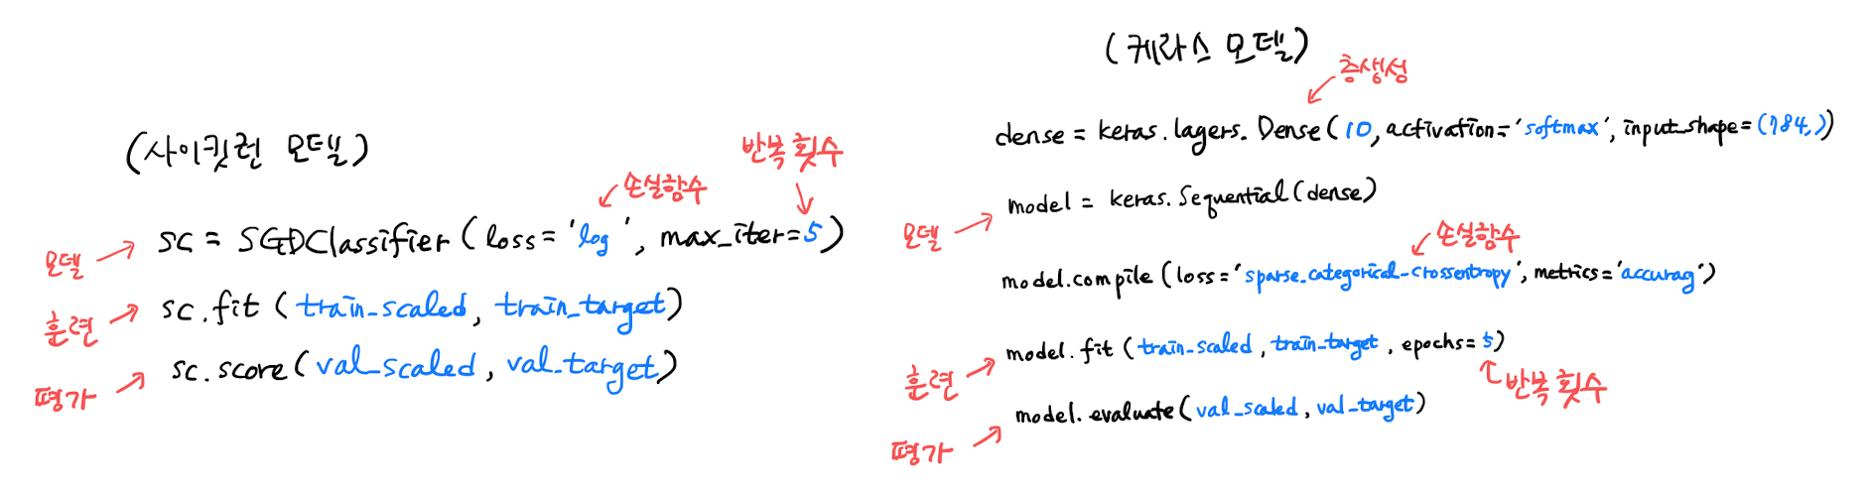